# Kmeans Clustering tutorial

Made by: Keely Brown, May 2, 2024

Updated: Keely Brown, July 16, 2025

Some applications require separating objects into parts, for example by tissue type, in order to create separate masks for each type. Kmeans clustering can be used to classify pixels into a user-specified number of categories. These categories can then be joined together into the discrete parts you are interested in to form separate masks. This tutorial uses the functions: `learn.train_kmeans` to take a set of images to train a classifier model, `predict_kmeans` to classify pixels in an input image using the model, and finally `mask_kmeans` to group clusters and form combined masks. 

In [ ]:
# Install PlantCV and required dependencies
%pip install "altair>=5" ipympl plantcv

# Give access and mount your Google Drive (need a Google Account)
# Change path to directory you wish output files to be saved to.
from google.colab import drive
drive.mount('/content/gdrive')

# Enable widget feature with matplotlib
from google.colab import output
output.enable_custom_widget_manager()

#View working directory, may need to change path
%pwd
# Change your working directory to the mounted drive 
%cd gdrive/MyDrive/ 
# Print the contents of your drive to confirm it worked 
!ls 
# Clone the workshop's repository to your Google Drive 
!git clone https://github.com/danforthcenter/plantcv-tutorial-kmeans-clustering.git

In [ ]:
# Set the notebook display method
# inline = embedded plots, notebook = interactive plots
%matplotlib widget

# Import libraries
from plantcv import plantcv as pcv
from plantcv.learn import train_kmeans
from plantcv.parallel import WorkflowInputs

In [2]:
# Set debug to the global parameter 
pcv.params.debug = "plot"
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

# Google Colaboratory Users:

If you are running this notebook using Google Colaboratory, you will need to clone the repository from GitHub to your personal Google Drive account. This is the only way to access the directory of test images for training. 

# Train your clustering model

Using a set of training images, `learn.train_kmeans` uses a patch-based clustering method to fit a model for classifying pixels in target images downstream. By using a patch-based method, this function finds a neighborhood of pixels around a focal pixel to inform cluster membership. The size of this neighborhood is controlled by the parameter `patch_size`. You must provide the number of clusters (`k`), which should be larger than the number of categories you expect your image to contain in order to allow for variance within categories. *Warning: this step can take a little bit of time depending on the number of images and the patch size* 

In [ ]:
# img_dir - path to training images
# k - number of clusters
# out_path - where to store the model fit file - may need to change this depending on your working directory
# patch_size - pixel neighborhood size
# num_imgs - how many images to use as a training set, will choose randomly


train_kmeans(img_dir="./training_images/", 
             out_path="./kmeansout_seed.fit", k=5, patch_size=5, num_imgs=5)

MiniBatchKMeans(n_clusters=10, n_init=10, random_state=1)

# Use your model to classify target images

Once you have trained a model, use it to classify pixels in an image of interest using `pcv.predict_kmeans`. You should specify the same patch size as the model fit, so it is a good idea to keep track of model-specific patch size.

In [3]:
# Input/output options
args = WorkflowInputs(
    images=["./training_images/CoVar_0300_3.png"],
    names="image",
    result="example_results.json",
    outdir=".",
    writeimg=False,
    debug="plot"
    )

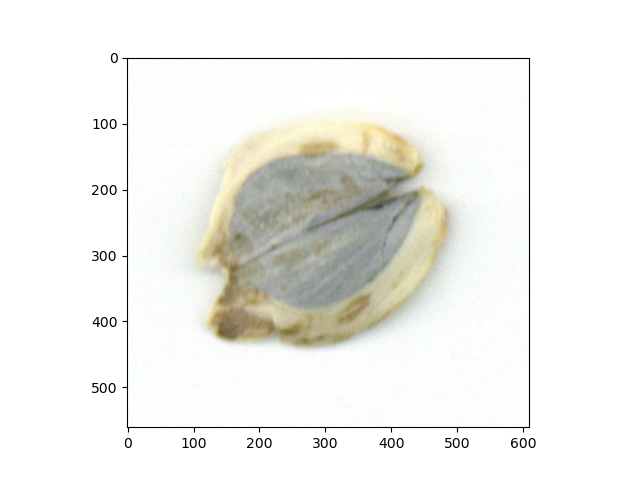

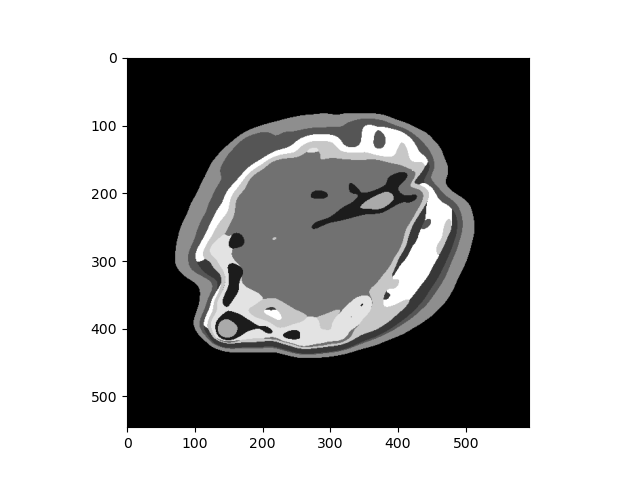

In [ ]:
# Label your target image
labeled_img = pcv.predict_kmeans(img=args.image,
                                 model_path="./kmeansout_seed.fit", patch_size=5)

# Combining clusters into masks by type: Option 1

To manually combine clusters into grouped masks by object type or part of object, use `pcv.mask_kmeans`.

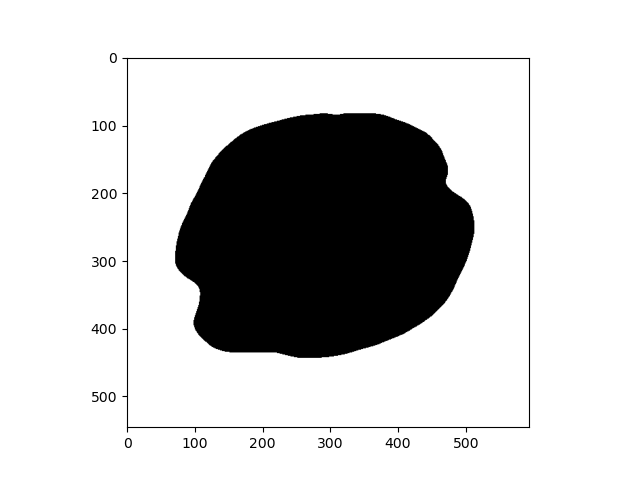

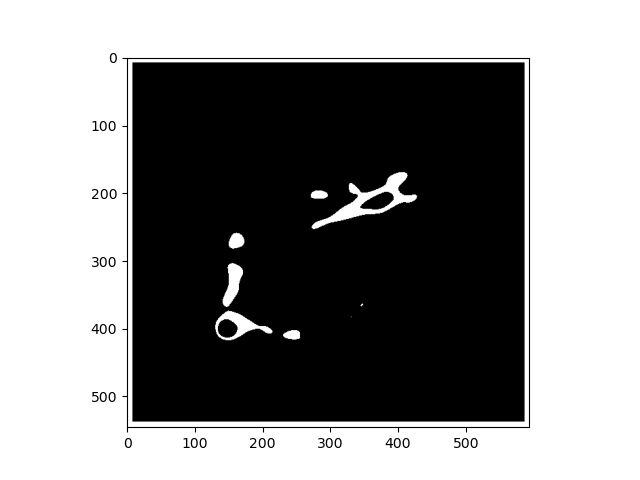

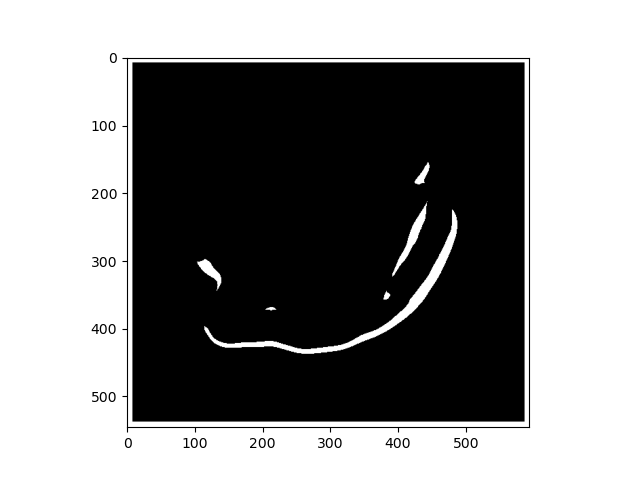

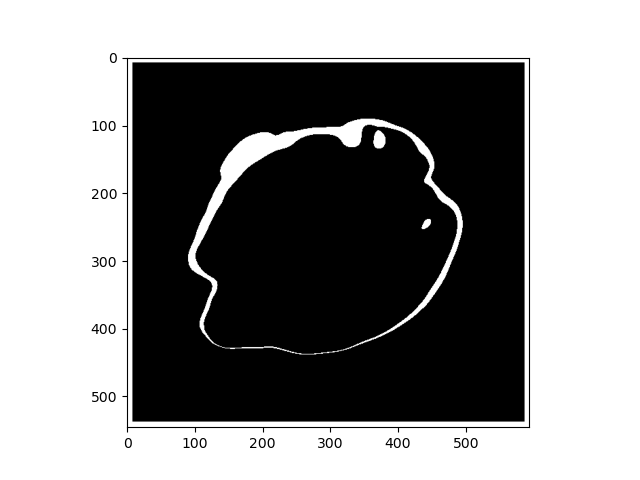

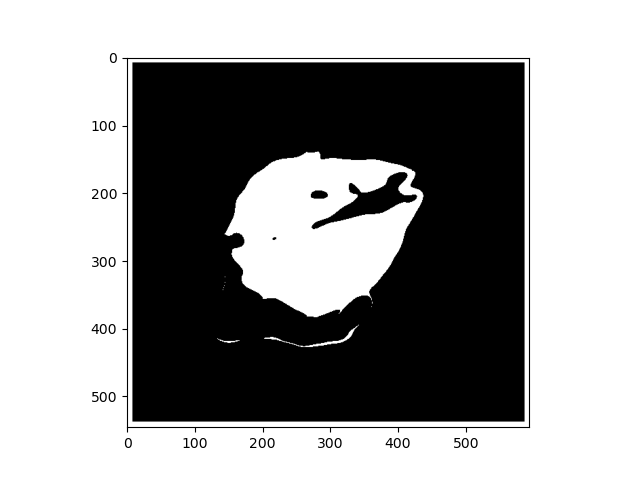

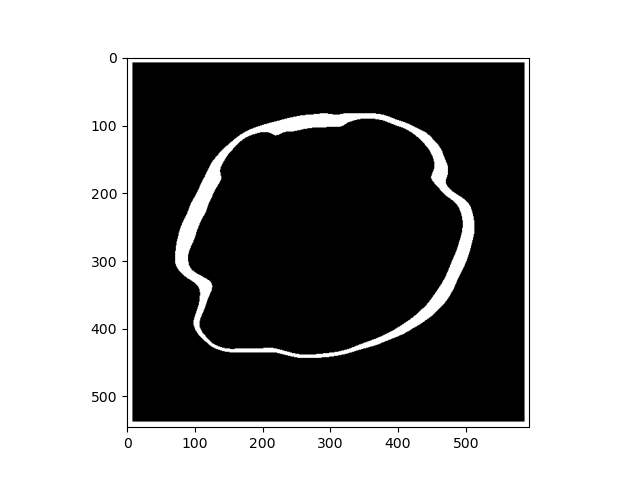

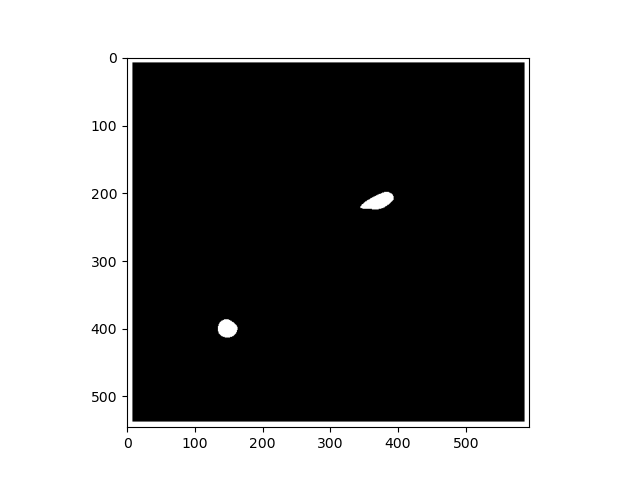

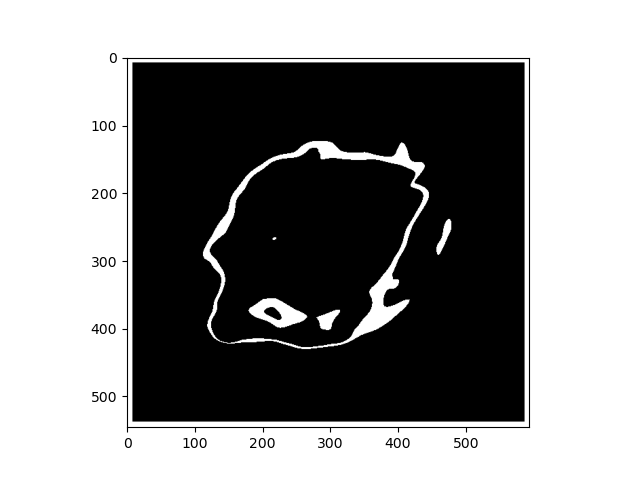

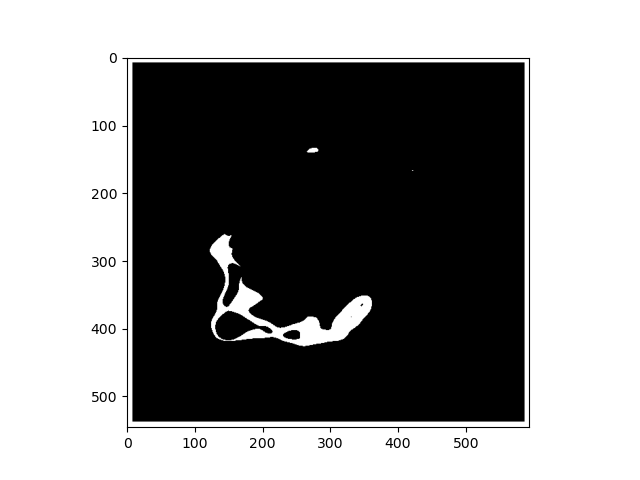

/Users/kbrown/Github/plantcv/plantcv/plantcv/plot_image.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


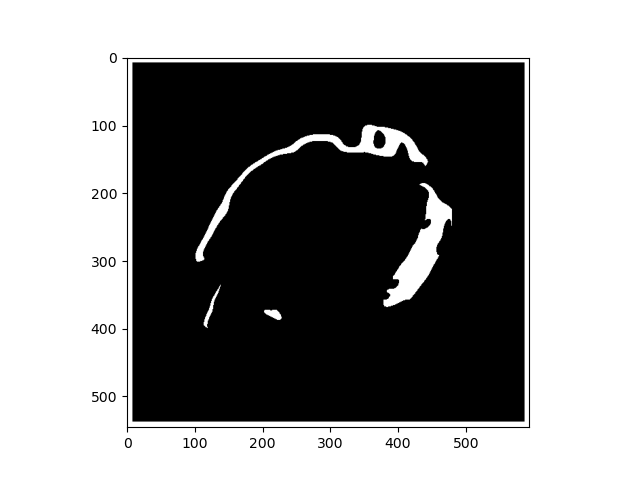

{'0': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 '1': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 '2': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 '3': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 '4': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1,

In [ ]:
# Without a list of clusters, mask_kmeans will output each cluster as an individual mask
all_masks = pcv.mask_kmeans(labeled_img=labeled_img, k=5)

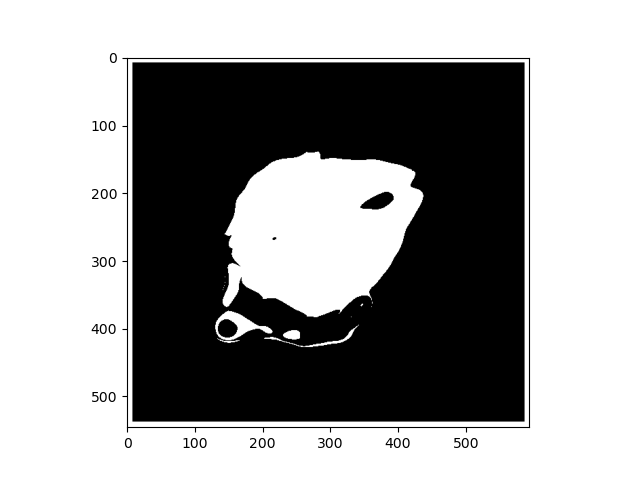

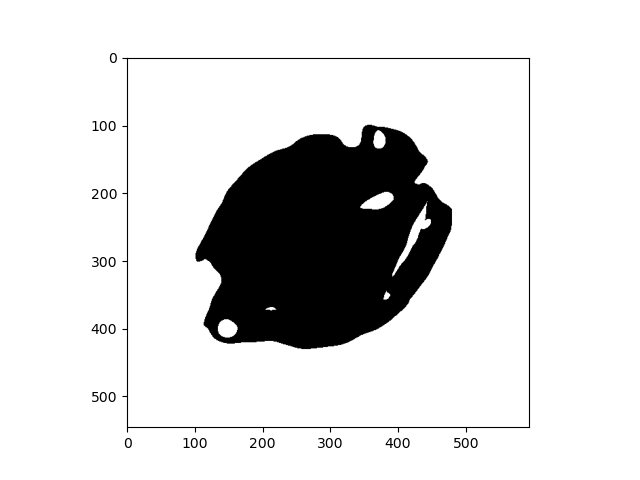

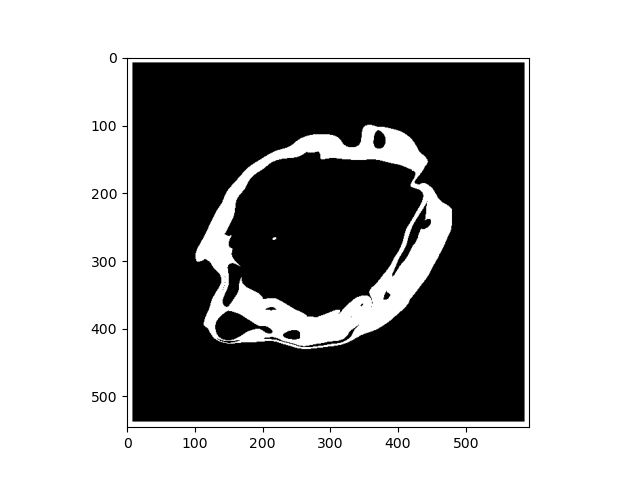

In [ ]:
# Then, once you have picked the clusters belonging to each category, give mask_kmeans a list:
# Remember, the patch_size and k must match the training and classification steps 
seed = pcv.mask_kmeans(labeled_img=labeled_img, k=5, cat_list=[1,3,4])
background = pcv.mask_kmeans(labeled_img=labeled_img, k=5, cat_list=[2])
wing = pcv.mask_kmeans(labeled_img=labeled_img, k=5, cat_list=[0])

# Combining clusters into masks by type: Option 2 

Instead of identifying the clusters belonging to each category and manually combining them into lists, the function `napari_join_labels` from the PlantCV Annotate add-on package will do the same thing using clicks in a separate Napari window. This requires first installing the plantcv-annotate.


In [5]:
import plantcv.annotate as pcvan

In [16]:
# Open an napari viewer with your classified image and categories
viewer = pcvan.napari_label_classes(img=labeled_img, classes=['background', 'seed','wing'])

The `napari_label_classes` command will initiate a window, where your labeled image will be brightly colored by category so that it is easy to tell the categories apart. The next cell just shows a screenshot of what that window will look like.

On the left of the window, you will see your classes. With one class highlighted, click the symbol that looks like a plus inside a circle, highlighted in blue in the screenshot. This is to add points to that category. Click inside of colored sections belonging to that class. Repeat for all but one of your classes. Any categories with no clicks will be assigned to the remaining category. In the screenshot, there are upside down triangles for "background" clicks and minus signs for "seed" clicks. 


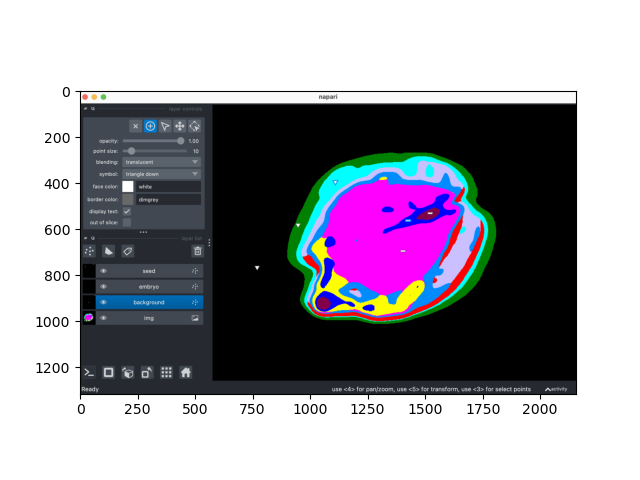

(array([[[241, 241, 241],
         [232, 232, 232],
         [220, 220, 220],
         ...,
         [250, 250, 250],
         [244, 244, 244],
         [209, 209, 209]],
 
        [[229, 229, 229],
         [208, 208, 208],
         [198, 198, 198],
         ...,
         [251, 251, 251],
         [253, 253, 253],
         [251, 251, 251]],
 
        [[202, 202, 202],
         [215, 215, 215],
         [254, 254, 254],
         ...,
         [250, 250, 250],
         [250, 250, 250],
         [249, 249, 249]],
 
        ...,
 
        [[ 48,  41,  38],
         [ 48,  41,  38],
         [ 48,  41,  38],
         ...,
         [ 48,  41,  38],
         [ 48,  41,  38],
         [ 48,  41,  38]],
 
        [[ 52,  45,  42],
         [ 48,  41,  38],
         [ 48,  41,  38],
         ...,
         [ 48,  41,  38],
         [ 48,  41,  38],
         [ 48,  41,  38]],
 
        [[ 60,  54,  51],
         [ 52,  45,  42],
         [ 48,  41,  38],
         ...,
         [ 48,  41,  38],
  

In [ ]:
example_napari = pcv.readimage("napari_open.png")

With your Napari window still open, run `napari_join_labels` to create a new labeled mask with your combined classes. A dictionary of masks is also produced that allows you to view each combined class mask separately for downstream analysis.

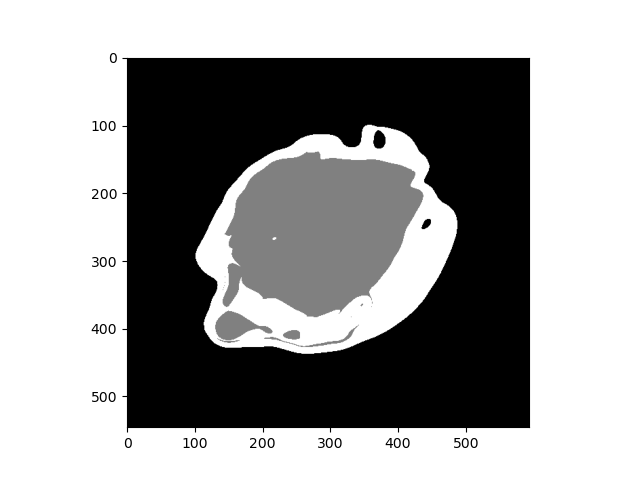

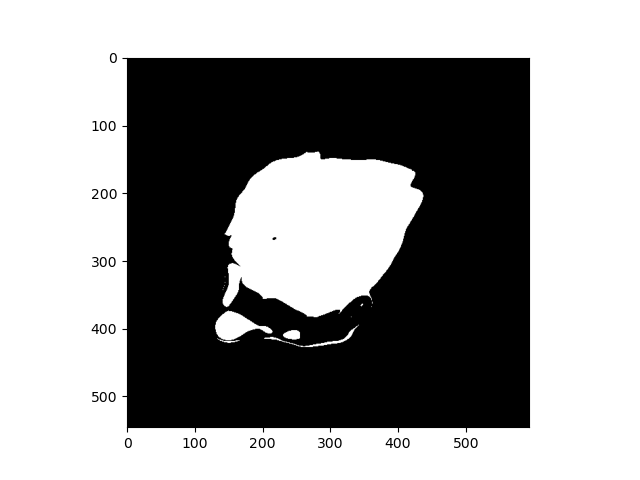

In [ ]:
labeledmask, mask_dict = pcvan.napari_join_labels(img=labeled_img, viewer=viewer)
plot_seed = pcv.plot_image(mask_dict['seed'])

# Tips
If you find you are not getting good distinction between categories, or clusters that span more than one category, try modifying `patch_size`, increasing `k`, or trying a different value for `sigma` (which determines the severity of blur in the image before training) in `train_kmeans`. 
